##Desafio 2: Determinando o Estoque de Segurança.

In [ ]:
#Importando as bibliotecas

# Manipulação de Dados
import pandas as pd
import numpy as np
from google.colab import files
import math

# Datas
from datetime import datetime, timedelta

# Visualizações
from matplotlib import pyplot as plt
import seaborn as sns

# Estatística
import scipy.stats as stat
from scipy.stats import binom
from collections import Counter
from scipy import stats

In [ ]:
### leitura dos dados csv
from google.colab import files
files.upload()

df = pd.read_csv("desafio_02_estoque.csv", sep = ",")

Saving desafio_02_estoque.csv to desafio_02_estoque.csv


In [ ]:
#informação sobre arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            370 non-null    object
 1   vendas-iogurte  370 non-null    int64 
 2   lead-time       370 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [ ]:
#Leitura dos 20 ultimos dados do DF
df.tail(20)

,data,vendas-iogurte,lead-time
350,2021-09-19,5011,4
351,2021-09-26,4860,4
352,2021-10-03,4968,5
353,2021-10-10,5026,4
354,2021-10-17,5044,4
355,2021-10-24,4924,5
356,2021-10-31,4960,4
357,2021-11-07,5132,4
358,2021-11-14,4856,4
359,2021-11-21,4924,3


In [ ]:
#Análise inicial do df
df.describe()

,vendas-iogurte,lead-time
count,370.000000,370.000000
mean,4999.170270,5.094595
std,77.285068,1.578728
min,4811.000000,1.000000
25%,4947.000000,4.000000
50%,4996.000000,5.000000
75%,5054.000000,6.000000
max,5233.000000,9.000000


1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição
normal? Que características você identificou para chegar a essa conclusão?

         data  vendas-iogurte  lead-time
0  2015-01-04            5083          4
1  2015-01-11            4936          3
2  2015-01-18            5051          6
3  2015-01-25            4846          4
4  2015-02-01            5003          5


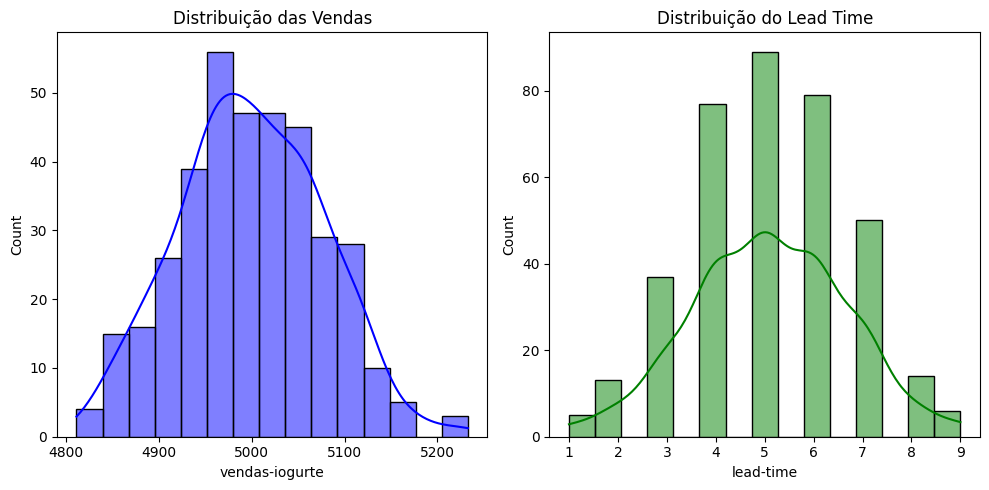

In [ ]:
# Carregar os dados
data = pd.read_csv('desafio_02_estoque.csv')

# Visualizar as primeiras linhas dos dados
print(data.head())

# Plotar os histogramas das vendas e do lead time
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['vendas-iogurte'], kde=True, color='blue')
plt.title('Distribuição das Vendas')

plt.subplot(1, 2, 2)
sns.histplot(data['lead-time'], kde=True, color='green')
plt.title('Distribuição do Lead Time')

plt.tight_layout()
plt.show()

2. Assuma que:


a. Os dados seguem uma distribuição normal.
b. O time de vendas utilize para o produto em questão o nível de serviço de 99,87%

In [ ]:
# Testar a normalidade das vendas e do lead time
print("Teste de Shapiro-Wilk para Vendas:", stats.shapiro(data['vendas-iogurte']))
print("Teste de Shapiro-Wilk para Lead Time:", stats.shapiro(data['lead-time']))

Teste de Shapiro-Wilk para Vendas: ShapiroResult(statistic=0.9953876733779907, pvalue=0.34423601627349854)
Teste de Shapiro-Wilk para Lead Time: ShapiroResult(statistic=0.9641580581665039, pvalue=7.122802259118544e-08)


In [ ]:
import math

# Calcular o estoque de segurança ideal
nível_de_serviço = 0.9987  # 99,87%
z_score = stats.norm.ppf(nível_de_serviço)
desvio_padrao_vendas = data['vendas-iogurte'].std()
demanda_media = 4999.17
lead_time = 5.09
variancia = np.var(df[''], ddof=1)

estoque_segurança = z_score * math.sqrt(demanda_media * lead_time * variancia_demanda)
print("Estoque de Segurança Ideal:", estoque_segurança)

Estoque de Segurança Ideal: 232.74040916322096


In [ ]:
df.describe()

,vendas-iogurte,lead-time
count,370.000000,370.000000
mean,4999.170270,5.094595
std,77.285068,1.578728
min,4811.000000,1.000000
25%,4947.000000,4.000000
50%,4996.000000,5.000000
75%,5054.000000,6.000000
max,5233.000000,9.000000


In [ ]:
O correto é o zcore multiplicado pela raiz quadrada da potência di desvio padrão multiplicado pela média do lead time

In [ ]:
import math

# Função para calcular o estoque de segurança
def calcular_estoque_seguranca(nivel_servico, demanda_media, lead_time, variancia_demanda):
    # Calculando o Z-score correspondente ao nível de serviço
    z_score = stats.norm.ppf(nivel_servico)

    # Calculando o estoque de segurança
    estoque_seguranca = z_score * math.sqrt(demanda_media * lead_time * variancia_demanda)

    return estoque_seguranca

# Exemplo de utilização
nivel_servico = 0.9987  # Nível de serviço desejado (99,87%)
demanda_media = 100     # Demanda média durante o lead time
lead_time = 7            # Lead time em dias
variancia_demanda = 25  # Variância da demanda durante o lead time

estoque_seguranca = calcular_estoque_seguranca(nivel_servico, demanda_media, lead_time, variancia_demanda)
print("Estoque de Segurança:", estoque_seguranca)